# <font color=blue><center>Slowly Changing Dimensions in Snowflake Using Streams and Tasks</center></font>
## Agenda

### Snowflake Datawarehouse
One of the broadest uses of Snowflake is building a data warehouse platform or enhancing the existing data lake. It offers all sorts of services to build an efficient Data warehouse with ETL capability and support for various external data partners.
- Dimensions
- Facts
- SCD
- Type-1
- Type-2
- Type-3

### Architecture
- Overview of data flow
- Tech Stack
- End result

### Environment Setup
- AWS EC2 instance and security group creation
- Docker installation and running
- Usage of docker-composer and starting all the tools
- How to access tools in local machine

### Amazon S3 Set up
- S3 terminology
- Accesskey creation
- Bucket creatio
- Demonstration to upload a file

### Test data preparation
- Faker
- Code walkthru

### Extraction
- NiFi-S3 integration
- Push files using NiFi

### Snowflake Components
- Warehouse
- Database and Schema
- Table
- View
- Stored procedure
- Snow Pipe
- Stream
- Task

### SCD Type-1 Implementation

### SCD Type-2 Implementation

## <font color=blue>Datawarehouse and Snowflake</font>

### Data Warehouse
- Data Warehouse is a system for Analysis & Reporting.
- Considered as core component of Bussiness Intelligence.
- Repository of one or more disprate data sources.
![alt text](./images/what-is-a-data-warehouse.png)

### Snowflake Architecture
- Hybrid of Shared disk & Shared Nothing Database Archiecture.
- Similar to Shared disk archiecture Snowflake have central Data Repository.
- But Similar to Shared Nothing Archiecture Snowflake process queries with massive parallelism.

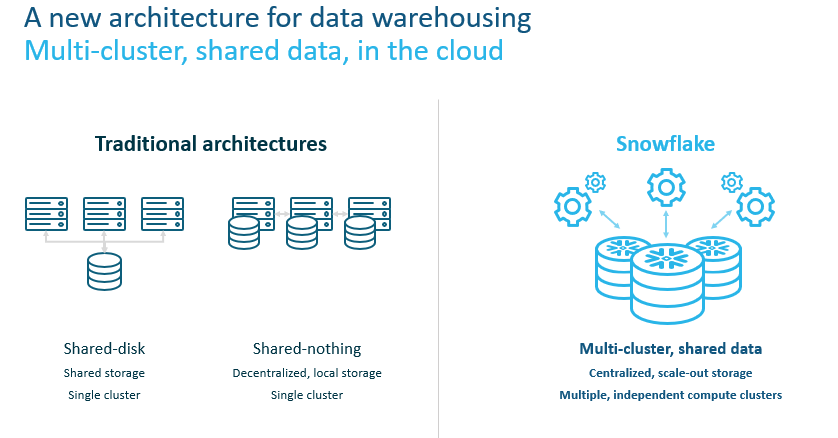
![alt text ><](./images/architecture-overview.png)

### Dimensions and Facts
- Fact is quantitative term such as Sales information
- Dimensions are components to fatcs & describe the objects in facts table.
![alt text ><](./images/facts_dimensions.png)

- Based on the fields in fact we can get the related data for it.
- Fact tables are reffered in Analytics very Frequently.
- Overloading data will result in slowing down the performance.
- Thats why we used Star SCHEMA/ STAR schema and differnect techniques to divide table into facts & dimension.


### SCD
- Time varients ( Historical data is Skipped)
- Non Volitile (Historical data will stored & will never be modified)

Is Dimension change over time ?

Yes, Ofcourse. No in fixed interveal but ocasionally & slowly based on changing requirement.

Consider example:

| customer_id | first_name | last_name | email | street | city | state | country |
|-------------|------------|-----------|-------|--------|------|-------|---------|
| 1 | John | Leo | jleo@email.com | Some street | Hyderabad | Telangana | India |


### Type-1 (Overrirte the Value)

| customer_id | first_name | last_name | email | street | city | state | country |
|-------------|------------|-----------|-------|--------|------|-------|---------|
| 1 | John | Leo | jleo@email.com | Some street | **Delhi** | Telangana | India |


### Type-2 (Preserve History)

Table 1:

| customer_id | first_name | last_name | email | street | city | state | country | Version |
|-------------|------------|-----------|-------|--------|------|-------|---------|---------|
| 1 | John | Leo | jleo@email.com | Some street | Hyderabad | Telangana | India | 1 |
| 1 | John | Leo | jleo@email.com | Some street1 | Hyderabad | Telangana | India | 2 |

Table 2:

| customer_id | first_name | last_name | email | street | city | state | country | Start_date | End_date | is_active |
|-------------|------------|-----------|-------|--------|------|-------|---------|------------|----------|-----------|
| 1 | John | Leo | jleo@email.com | Some street | Hyderabad | Telangana | India | 01/01/2021 | 10/01/2021 | NO |
| 1 | John | Leo | jleo@email.com | Some street1 | Hyderabad | Telangana | India | 10/02/2021 | Null/9999-12-31 | YES |

- Not Suitable for  when there is a change pf Schema Evaluation or DDL Chnages.
- Becuase effective dates are already defined & its very expensive to modify.
- It Increases the size of the warehouse and the table becuase we're storing all the data.
- If Changes are expected frequent then it will create some performance bottlleneck.
- Concluding Nature we need to s=decide weather to go with SCD type-2 or not.


### Type-3 ( preserve partical History)

Here's the table from the image converted to markdown format:

| customer_id | first_name | last_name | email | current_street | old_street | city | state | country |
|-------------|------------|-----------|-------|----------------|------------|------|-------|---------|
| 1 | John | Leo | jleo@email.com | Some street1 | Some street | Hyderabad | Telangana | India |

## <font color=blue>Architecture</font>
### Overview of data flow
#### Data Flow Architecture
![alt text](./images/scd-archiecture.drawio.png)
### Tech Stack
* AWS EC2 and S3
* Docker
* Jupyter Lab
* NiFi
* Python
* Snowflake

### End result

## <font color=blue>Environment Setup</font>
### AWS EC2 instance and security group creation
- t2.xlarge instance
- 32GB of storage recommended
- Allow ports 4000 - 38888
- Connect to ec2 via ssh: `ssh -i "twitter_analysis.pem" ec2-user@ec2-44-211-133-199.compute-1.amazonaws.com`
- Connect to ec2 via ssh with Port forwarding : `ssh -i "twitter_analysis.pem" ec2-user@ec2-44-211-133-199.compute-1.amazonaws.com -L 2081:localhost:2041 -L 4888:localhost:4888 -L 2080:localhost:2080 -L 8050:localhost:8050 -L 4141:localhost:4141` 
- Copy from local to ec2: `scp -r -i "twitter_analysis.pem" code\docker_exp ec2-user@ec2-44-203-59-228.compute-1.amazonaws.com:/home/ec2-user/docker_exp`
### Docker installation and running
    
##### Usage of docker-composer and starting all the tools

#### Commands to install Docker

- `sudo yum update -y`
- `sudo yum install docker`
- `sudo yum install -y libxcrypt-compat`
- `sudo curl -L "https://github.com/docker/compose/releases/download/1.29.1/docker-compose-$(uname -s)-$(uname -m)" -o /usr/local/bin/docker-compose`
- `sudo chmod +x /usr/local/bin/docker-compose`
- `sudo gpasswd -a $USER docker`
- `newgrp docker`
- Start Docker: `sudo systemctl start docker`
- Stop Docker: `sudo systemctl stop docker`

#### How to access tools in local machine 
- List Docker containers running: `docker ps`
- CLI access in Docker container: `docker exec -i -t nifi bash`
- Jupyter Lab at: http://localhost:4888/lab? 
- NiFi at: http://localhost:2080/nifi/ 

## <font color=blue>Amazon S3 Set up</font>

### S3 terminology
- Identity and Access Management (IAM)
- Access Keys
- Bucket
- Folder

### Accesskey creation
### Bucket creation
### Demonstration to upload a file

## <font color=blue>Extraction</font>

### Test data preparation
- Faker
- Code walkthru
- <code>docker exec -i -t nifi bash
  mkdir -p scd 
  cp /opt/workspace/nifi/FakeDataset/customer_(timestamp).csv scd/
  Example: 
    cp /opt/workspace/nifi/FakeDataset/customer_20241012192443.csv scd/
  </code>

### Nifi
- Processor
- Connection
- Goto http://localhost:2080/nifi/
- NiFi-S3 integration
- Push files using NiFi

## <font color=blue>Transformation and Load</font>

### Snowflake Components
- Warehouse/Virtual Warehouse
    - Virtual Warehouse is nothing but a simple warehouse.
    - It is a cluster of compute resoucesin snowlflake.
    - Warehosue provide the required resources such as CPU, memory & temporary storagr to perform DML/DDL operations
- Database and Schema
    - Database and Schema are used to organize the data stored in snowflake.
    - Database is a logical gropuping of Schema.
    - Schema is a logical grouping of database objects such as Tables, Views, Stored Procedures, Stages, Formats etc...
    - Database & Schema together are called `namespace` in snowflake.
    - Database is assoicated to one snowlfake account Where as schema is accoicated with single database
- Table
    - All data in snowflake is stored in database tables
    - Tables are logical collection of columns and rows
    - read docs: micropartitions & data clustering
- View
    - View allow the reuslt of a query to be access as if it is a table
    - If you want to give access to very few users or subset of data then you should create View.
    - Query View == Query underline table
- Stored procedure
    - Stored procedure is nothing but a function in programming language that calls aparticular code to execute.
    - Extends Snowflake SQL by Javascript so that we can include programming constraints (i:e., branching , looping)
- Snow Pipe
    - Snow pipe enable data loading as soon as it is available in our targeted location i:e., S3, ADLS genII etc.
    - Helps in loading data from files in mircro badges, making it available with in minutes.
    - helps in avioding mannual efforts of COPYING statements
    - Consider it as Trigger if you're familier with any Scheduling tool.
- Stream
    - Detech in row level change between two transactional point of time.
    - Stream captures all DML changes as metadata.
    - About each changes so that the actions can be taken.
    - simply, it does CDC
- Task
    - Task can Execute the single SQL statement including to call the stored procedure.
    - Moslty combines with stream to perfrom the complete ETL

#### SQS Setup

### SCD Type-1 Implementation

### SCD Type-2 Implementation